In [121]:
import pandas as pd
import numpy as num_paths
import matplotlib.pyplot as psnrResault
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [122]:
df=pd.read_csv("dataTest.csv")

In [123]:
df.head()

,host,avgRTT,packetLoss,latency,hopCount,bandwidth,yukOrani,psnr,ssim_first,ssim_second,type,server
0,h1,1898.137,0.0,66,4,3000000,2011.425000,31.225948,0.985150,18.282783,3,h10
1,h2,2240.660,0.0,44,3,3000000,1859.161290,31.225948,0.985150,18.282674,3,h14
2,h3,2196.294,0.0,40,2,3000000,9084.620155,22.700112,0.956348,13.599976,3,h14
3,h4,1298.732,0.0,60,3,3000000,25815.963636,22.301604,0.960533,14.037636,3,h14
4,h5,338.105,0.0,92,4,3000000,37246.273632,22.510259,0.958593,13.829213,3,h10


In [124]:
df["vMOSLabel"]=6
for i in range(0,df.shape[0],1):
    if(df.ssim_first[i]>=0.99):
        df.vMOSLabel[i]=5
    elif(df.ssim_first[i]>=0.95 and df.ssim_first[i]<0.99):
        df.vMOSLabel[i]=4
    elif(df.ssim_first[i]>=0.88 and df.ssim_first[i]<0.95):
        df.vMOSLabel[i]=3
    elif(df.ssim_first[i]>=0.5 and df.ssim_first[i]<0.88):
        df.vMOSLabel[i]=2
    elif(df.ssim_first[i]<0.5):
        df.vMOSLabel[i]=1

df["vMOSLabel"].value_counts()

5    177
4     85
2     62
3     38
Name: vMOSLabel, dtype: int64

In [125]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,360.0,1.029936e+03,1.046241e+03,1.529400e+02,3.096350e+02,4.235220e+02,1.859842e+03,4.744949e+03
packetLoss,360.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
latency,360.0,7.866389e+01,6.671225e+01,1.300000e+01,5.275000e+01,7.450000e+01,9.125000e+01,1.035000e+03
hopCount,360.0,3.108333e+00,1.051296e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,360.0,5.319444e+06,2.637983e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,1.000000e+07
yukOrani,360.0,3.063770e+04,2.560854e+04,4.751573e+02,9.132790e+03,2.588607e+04,4.449114e+04,1.770201e+05
psnr,360.0,3.678594e+01,1.646139e+01,1.267172e+01,2.194262e+01,3.122953e+01,5.505260e+01,5.506194e+01
ssim_first,360.0,9.290974e-01,1.225030e-01,5.138590e-01,9.421713e-01,9.852710e-01,9.997650e-01,9.997650e-01
ssim_second,360.0,2.243359e+01,1.249835e+01,3.132379e+00,1.237905e+01,1.831822e+01,3.628266e+01,3.628266e+01
type,360.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


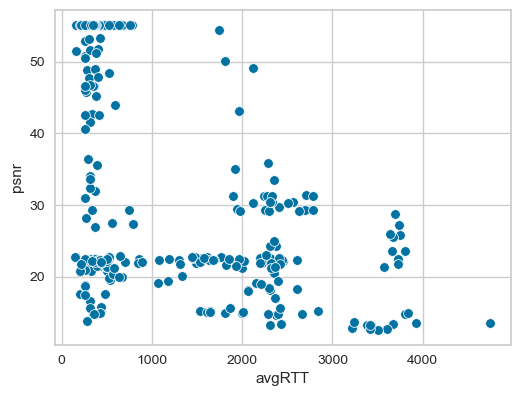

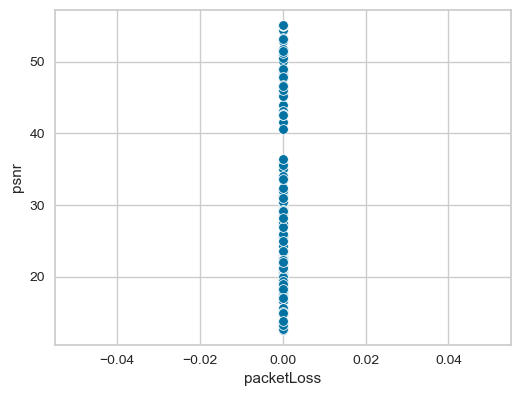

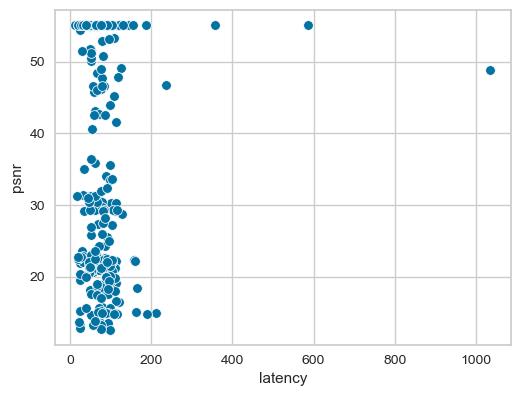

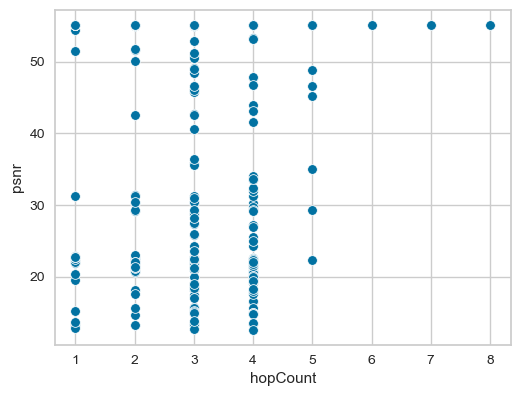

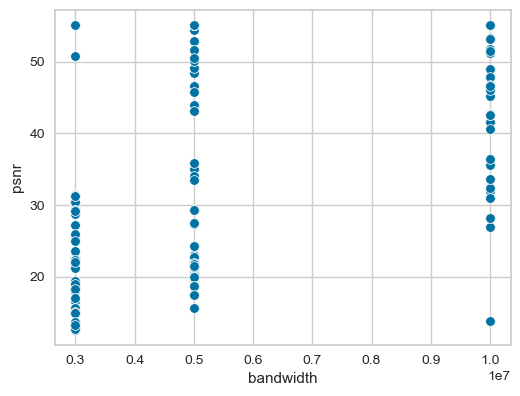

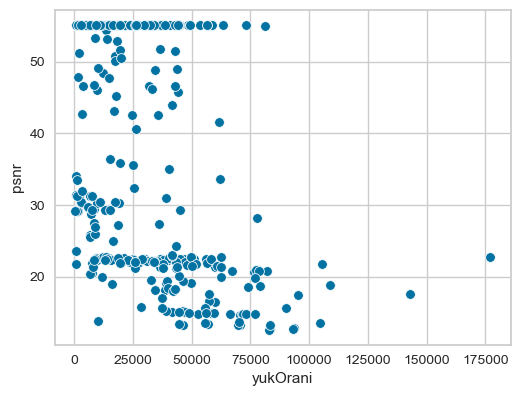

In [126]:
sayisal_veriler=["avgRTT","packetLoss","latency","hopCount","bandwidth","yukOrani"]
for i,deger in enumerate(sayisal_veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.scatterplot(x=deger,y="psnr",data=df)
    plt.show()

In [127]:
# sns.displot(df)

In [128]:
y=df["vMOSLabel"]
x=df.drop(["host","ssim_second","type","psnr","server","packetLoss","vMOSLabel"],axis="columns")


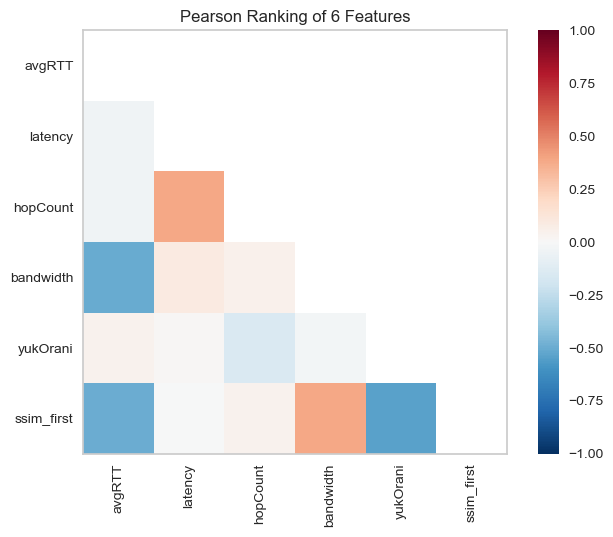

<AxesSubplot:title={'center':'Pearson Ranking of 6 Features'}>

In [129]:
from yellowbrick.features import Rank2D
visualizer=Rank2D(algorithm="pearson")
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.show()

In [130]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,360.0,1.029936e+03,1.046241e+03,1.529400e+02,3.096350e+02,4.235220e+02,1.859842e+03,4.744949e+03
latency,360.0,7.866389e+01,6.671225e+01,1.300000e+01,5.275000e+01,7.450000e+01,9.125000e+01,1.035000e+03
hopCount,360.0,3.108333e+00,1.051296e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,360.0,5.319444e+06,2.637983e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,1.000000e+07
yukOrani,360.0,3.063770e+04,2.560854e+04,4.751573e+02,9.132790e+03,2.588607e+04,4.449114e+04,1.770201e+05
ssim_first,360.0,9.290974e-01,1.225030e-01,5.138590e-01,9.421713e-01,9.852710e-01,9.997650e-01,9.997650e-01


In [131]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.5, random_state=42)

In [132]:
from imblearn.combine import SMOTEENN
sme=SMOTEENN(random_state=42)
#X_res,y_res=sme.fit_resample(X,y)
XUpSample, yUpsample=sme.fit_resample(XTrain,yTrain)
yUpsample.value_counts()

2    59
4    48
5    43
3    41
Name: vMOSLabel, dtype: int64

In [133]:
XUpSample.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,191.0,1.674607e+03,1.187377e+03,1.547300e+02,4.015979e+02,1.784639e+03,2.418850e+03,4.744949e+03
latency,191.0,8.157068e+01,8.299502e+01,1.700000e+01,6.100000e+01,7.200000e+01,8.800000e+01,1.035000e+03
hopCount,191.0,2.827225e+00,9.439515e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
bandwidth,191.0,4.618467e+06,2.515954e+06,3.000000e+06,3.000000e+06,3.000000e+06,5.000000e+06,1.000000e+07
yukOrani,191.0,3.785968e+04,2.717447e+04,4.751573e+02,9.670701e+03,4.275350e+04,5.561589e+04,1.046566e+05
ssim_first,191.0,8.583385e-01,1.633348e-01,5.238390e-01,6.715943e-01,9.479190e-01,9.850224e-01,9.997650e-01


In [134]:
XTrain=XUpSample.drop("ssim_first",axis=1)

In [135]:
yTrain=yUpsample

In [136]:
XTest

,avgRTT,latency,hopCount,bandwidth,yukOrani,ssim_first
225,2395.146,95,4,3000000,39415.688442,0.784194
42,2061.652,75,3,3000000,34135.407407,0.769184
286,344.608,50,2,10000000,53430.495000,0.999765
303,304.346,105,4,10000000,44261.542857,0.999764
56,439.621,79,3,3000000,28239.216867,0.729143
...,...,...,...,...,...,...
254,2779.021,115,5,3000000,7678.291667,0.983920
130,742.619,48,2,5000000,44833.406699,0.982197
38,3806.569,30,3,3000000,604.585106,0.931159
11,312.704,45,4,3000000,46571.702929,0.955942


In [137]:
XTest=XTest.drop("ssim_first",axis=1)


In [138]:
yTest.value_counts()

5    92
4    41
2    28
3    19
Name: vMOSLabel, dtype: int64

In [139]:
XTrain.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,191.0,1.674607e+03,1.187377e+03,1.547300e+02,4.015979e+02,1.784639e+03,2.418850e+03,4.744949e+03
latency,191.0,8.157068e+01,8.299502e+01,1.700000e+01,6.100000e+01,7.200000e+01,8.800000e+01,1.035000e+03
hopCount,191.0,2.827225e+00,9.439515e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
bandwidth,191.0,4.618467e+06,2.515954e+06,3.000000e+06,3.000000e+06,3.000000e+06,5.000000e+06,1.000000e+07
yukOrani,191.0,3.785968e+04,2.717447e+04,4.751573e+02,9.670701e+03,4.275350e+04,5.561589e+04,1.046566e+05


In [140]:
yTrain.describe().T

count    191.000000
mean       3.392670
std        1.146045
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: vMOSLabel, dtype: float64

In [141]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.5903541685707558


In [142]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.6094249095356332 test: 0.13870901982527384
max_depth : 2 --> score r2 : eğitim:0.8989672560760124 test: 0.5518666028409264
max_depth : 3 --> score r2 : eğitim:0.9824858689483195 test: 0.7128613958940684
max_depth : 4 --> score r2 : eğitim:0.9953601944409312 test: 0.7194023862886796
max_depth : 5 --> score r2 : eğitim:0.9964651303605794 test: 0.7264414380784332
max_depth : 6 --> score r2 : eğitim:0.996932875965089 test: 0.7268495144412939
max_depth : 7 --> score r2 : eğitim:0.9965165260993623 test: 0.719614012195428
max_depth : 8 --> score r2 : eğitim:0.9974902798757973 test: 0.7259682818498909
max_depth : 9 --> score r2 : eğitim:0.9964536127895267 test: 0.7249402524403403
max_depth : 10 --> score r2 : eğitim:0.9971200130077207 test: 0.7195941381646633
max_depth : 11 --> score r2 : eğitim:0.9954898770560591 test: 0.7167024666884144
max_depth : 12 --> score r2 : eğitim:0.9982648749580396 test: 0.7097424907781487
max_depth : 13 --> score r2 : eğitim:0

In [143]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.5934857343604929
n_neigbors : 2 --> score r2 : eğitim:0.9959927828130245 test: 0.623974304283456
n_neigbors : 3 --> score r2 : eğitim:0.9884235947931819 test: 0.6005119068530276
n_neigbors : 4 --> score r2 : eğitim:0.991985565626049 test: 0.598284861107626
n_neigbors : 5 --> score r2 : eğitim:0.9892606579389057 test: 0.5938470803743947
n_neigbors : 6 --> score r2 : eğitim:0.9860860514341129 test: 0.5813153998644953
n_neigbors : 7 --> score r2 : eğitim:0.9861791897020641 test: 0.5743122723983575
n_neigbors : 8 --> score r2 : eğitim:0.9871643824479691 test: 0.5682903189380444
n_neigbors : 9 --> score r2 : eğitim:0.9862468348397632 test: 0.5637081461778459
n_neigbors : 10 --> score r2 : eğitim:0.9848126468613628 test: 0.5619582946475623
n_neigbors : 11 --> score r2 : eğitim:0.9829444888322943 test: 0.5584710069803407
n_neigbors : 12 --> score r2 : eğitim:0.9820510063500056 test: 0.5563473940428095
n_neigbors : 13 --> score r2 : eğitim:0.979

In [144]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.6141657482709595 test: 0.09356666979759398
max_depth : 2 --> score r2 : eğitim:0.8791433355889362 test: 0.47190328980284446
max_depth : 3 --> score r2 : eğitim:0.9698365833562208 test: 0.648361054017123
max_depth : 4 --> score r2 : eğitim:0.996393504531722 test: 0.6627738325261601
max_depth : 5 --> score r2 : eğitim:1.0 test: 0.6431708112719883
max_depth : 6 --> score r2 : eğitim:1.0 test: 0.6567212867933052
max_depth : 7 --> score r2 : eğitim:1.0 test: 0.6612381119670774
max_depth : 8 --> score r2 : eğitim:1.0 test: 0.6567212867933052
max_depth : 9 --> score r2 : eğitim:1.0 test: 0.6567212867933052
max_depth : 10 --> score r2 : eğitim:1.0 test: 0.6431708112719883
max_depth : 11 --> score r2 : eğitim:1.0 test: 0.6431708112719883
max_depth : 12 --> score r2 : eğitim:1.0 test: 0.6431708112719883
max_depth : 13 --> score r2 : eğitim:1.0 test: 0.6431708112719883
max_depth : 14 --> score r2 : eğitim:1.0 test: 0.6567212867933052
max_depth : 15 --> score 

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.9497447354491867 test: 0.6020123233922592
max_depth : 2 --> score r2 : eğitim:0.9940936462355002 test: 0.7098452863076338
max_depth : 3 --> score r2 : eğitim:0.9999983361204898 test: 0.7094307723949389
max_depth : 4 --> score r2 : eğitim:0.9999999954983021 test: 0.6688829652488507
max_depth : 5 --> score r2 : eğitim:0.9999999992944921 test: 0.6572967830353389
max_depth : 6 --> score r2 : eğitim:0.9999999992944921 test: 0.6554452439018361
max_depth : 7 --> score r2 : eğitim:0.9999999992944921 test: 0.6554626620340804
max_depth : 8 --> score r2 : eğitim:0.9999999992944921 test: 0.6572122736260477
max_depth : 9 --> score r2 : eğitim:0.9999999992944921 test: 0.6599507765044357


In [146]:
from sklearn.tree import ExtraTreeRegressor
for i in range(1,10,1):
    extraTree=ExtraTreeRegressor(max_depth=i)
    extraTree.fit(XTrain,yTrain)
    tahminExtra=extraTree.predict(XTest)
    print(r2_score(yTest,tahminExtra))

-0.2041256022433564
0.3603687643307798
0.4447188813460683
0.6246069653246168
0.37930037024969065
0.6070362098818098
0.48056510501618543
0.6431708112719883
0.5121828812325915


In [147]:
from sklearn.linear_model import RANSACRegressor
ransacReg=RANSACRegressor(random_state=42,)
ransacReg.fit(XTrain,yTrain)
print(r2_score(yTest,ransacReg.predict(XTest)))

0.6803487867700669


In [148]:
yTest

225    2
42     2
286    5
303    5
56     2
      ..
254    4
130    4
38     3
11     4
235    2
Name: vMOSLabel, Length: 180, dtype: int64

In [149]:
yTrain

0      2
1      2
2      2
3      2
4      2
      ..
186    5
187    5
188    5
189    5
190    5
Name: vMOSLabel, Length: 191, dtype: int64

In [150]:
sayisal_veriler=["avgRTT","latency","hopCount","bandwidth","yukOrani"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
XTrain[sayisal_veriler]=scaler.fit_transform(XTrain[sayisal_veriler])
XTest[sayisal_veriler]=scaler.transform(XTest[sayisal_veriler])

In [151]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.5903541685706253


In [152]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.6251035105768991
n_neigbors : 2 --> score r2 : eğitim:1.0 test: 0.6363955735113298
n_neigbors : 3 --> score r2 : eğitim:0.9986642609376748 test: 0.6677624149958596
n_neigbors : 4 --> score r2 : eğitim:0.9937387231453508 test: 0.6578504930867481
n_neigbors : 5 --> score r2 : eğitim:0.9876577710641155 test: 0.6298010087576222
n_neigbors : 6 --> score r2 : eğitim:0.9833032617209354 test: 0.6163207949612307
n_neigbors : 7 --> score r2 : eğitim:0.9804545937206706 test: 0.6303577765953688
n_neigbors : 8 --> score r2 : eğitim:0.9774594033232629 test: 0.6444411683521116
n_neigbors : 9 --> score r2 : eğitim:0.975610394158285 test: 0.6570001031620565
n_neigbors : 10 --> score r2 : eğitim:0.9703065206445116 test: 0.6729818574188854
n_neigbors : 11 --> score r2 : eğitim:0.9652266277163284 test: 0.6737433717457033
n_neigbors : 12 --> score r2 : eğitim:0.9620705762093916 test: 0.670209028631653
n_neigbors : 13 --> score r2 : eğitim:0.9560391676647777 

In [153]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.6094223823403567 test: 0.138553466930314
max_depth : 2 --> score r2 : eğitim:0.9109745838259656 test: 0.5916686748025659
max_depth : 3 --> score r2 : eğitim:0.9843569871532558 test: 0.7131287003953398
max_depth : 4 --> score r2 : eğitim:0.9954366910157623 test: 0.7299558701337934
max_depth : 5 --> score r2 : eğitim:0.9955325539191003 test: 0.7137431683019247
max_depth : 6 --> score r2 : eğitim:0.9960011089198464 test: 0.7267980226343129
max_depth : 7 --> score r2 : eğitim:0.9968302912051024 test: 0.7205444781812251
max_depth : 8 --> score r2 : eğitim:0.9975255433870426 test: 0.7142258914456351
max_depth : 9 --> score r2 : eğitim:0.9966082913729439 test: 0.7304232265187826
max_depth : 10 --> score r2 : eğitim:0.998183528449144 test: 0.7250405259591981
max_depth : 11 --> score r2 : eğitim:0.9969913813360188 test: 0.7306242252390154
max_depth : 12 --> score r2 : eğitim:0.9972618684961396 test: 0.7236624425986802
max_depth : 13 --> score r2 : eğitim:0.

In [154]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.6141657482709595 test: 0.09356666979759398
max_depth : 2 --> score r2 : eğitim:0.8791433355889362 test: 0.47190328980284446
max_depth : 3 --> score r2 : eğitim:0.9698365833562208 test: 0.648361054017123
max_depth : 4 --> score r2 : eğitim:0.996393504531722 test: 0.6627738325261601
max_depth : 5 --> score r2 : eğitim:1.0 test: 0.6612381119670774
max_depth : 6 --> score r2 : eğitim:1.0 test: 0.6431708112719883
max_depth : 7 --> score r2 : eğitim:1.0 test: 0.6567212867933052
max_depth : 8 --> score r2 : eğitim:1.0 test: 0.6567212867933052
max_depth : 9 --> score r2 : eğitim:1.0 test: 0.6612381119670774
max_depth : 10 --> score r2 : eğitim:1.0 test: 0.6567212867933052
max_depth : 11 --> score r2 : eğitim:1.0 test: 0.6431708112719883
max_depth : 12 --> score r2 : eğitim:1.0 test: 0.6612381119670774
max_depth : 13 --> score r2 : eğitim:1.0 test: 0.6612381119670774
max_depth : 14 --> score r2 : eğitim:1.0 test: 0.6431708112719883
max_depth : 15 --> score 

In [155]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.9497447354491867 test: 0.6020123233922592
max_depth : 2 --> score r2 : eğitim:0.9940936462355003 test: 0.7106366800357748
max_depth : 3 --> score r2 : eğitim:0.9999983361204898 test: 0.7082630685376601
max_depth : 4 --> score r2 : eğitim:0.9999999954983021 test: 0.669787657903159
max_depth : 5 --> score r2 : eğitim:0.9999999992944921 test: 0.6563902428477641
max_depth : 6 --> score r2 : eğitim:0.9999999992944921 test: 0.6569030273634182
max_depth : 7 --> score r2 : eğitim:0.9999999992944921 test: 0.6578235604263518
max_depth : 8 --> score r2 : eğitim:0.9999999992944921 test: 0.6582017559165214
max_depth : 9 --> score r2 : eğitim:0.9999999992944921 test: 0.6596448135453352
